In [6]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
# Cargando dataset
diabetes_data = pd.read_csv('data/diabetes.csv')

# Print head
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Analisis EDA Basico

In [9]:
# brinda información sobre los tipos de datos, columnas, recuentos de valores nulos, uso de memoria, etc.

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


El método DataFrame.describe() genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN. Este método nos dice muchas cosas sobre un conjunto de datos. Una cosa importante es que el método describe() trata sólo con valores numéricos. No funciona con ningún valor categórico. Entonces, si hay valores categóricos en una columna, el método describe() lo ignorará y mostrará un resumen de las otras columnas a menos que se pase el parámetro include="all".

Ahora, comprendamos las estadísticas que genera el método describe():

- count nos dice el número de filas no vacías en una característica.
- La media nos dice el valor medio de esa característica.
- std nos dice el valor de desviación estándar de esa característica.
- min nos dice el valor mínimo de esa característica.
- 25 %, 50 % y 75 % son el percentil/cuartil de cada característica. Esta información del cuartil nos ayuda a detectar valores atípicos.
- max nos dice el valor máximo de esa característica.

In [10]:
# detalles estadísticos básicos sobre los datos (tenga en cuenta que aquí solo se mostrarán columnas numéricas a menos que el parámetro incluya="all")

diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


La pregunta que surge de este resumen
¿Puede el valor mínimo de las columnas enumeradas a continuación ser cero (0)?
En estas columnas, un valor de cero no tiene sentido y, por tanto, indica un valor faltante.

Las siguientes columnas o variables tienen un valor cero no válido:

1. Glucosa
2. Presión arterial
3. Grosor de la piel
4. Insulina
5. IMC

Es mejor reemplazar los ceros con nan, ya que después contarlos sería más fácil y los ceros deben reemplazarse con valores adecuados.

In [17]:
diabetes_data_copy = diabetes_data.copy(deep=True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

# vemos la cuentas de los nans

print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Para completar estos valores Nan, es necesario comprender la distribución de datos

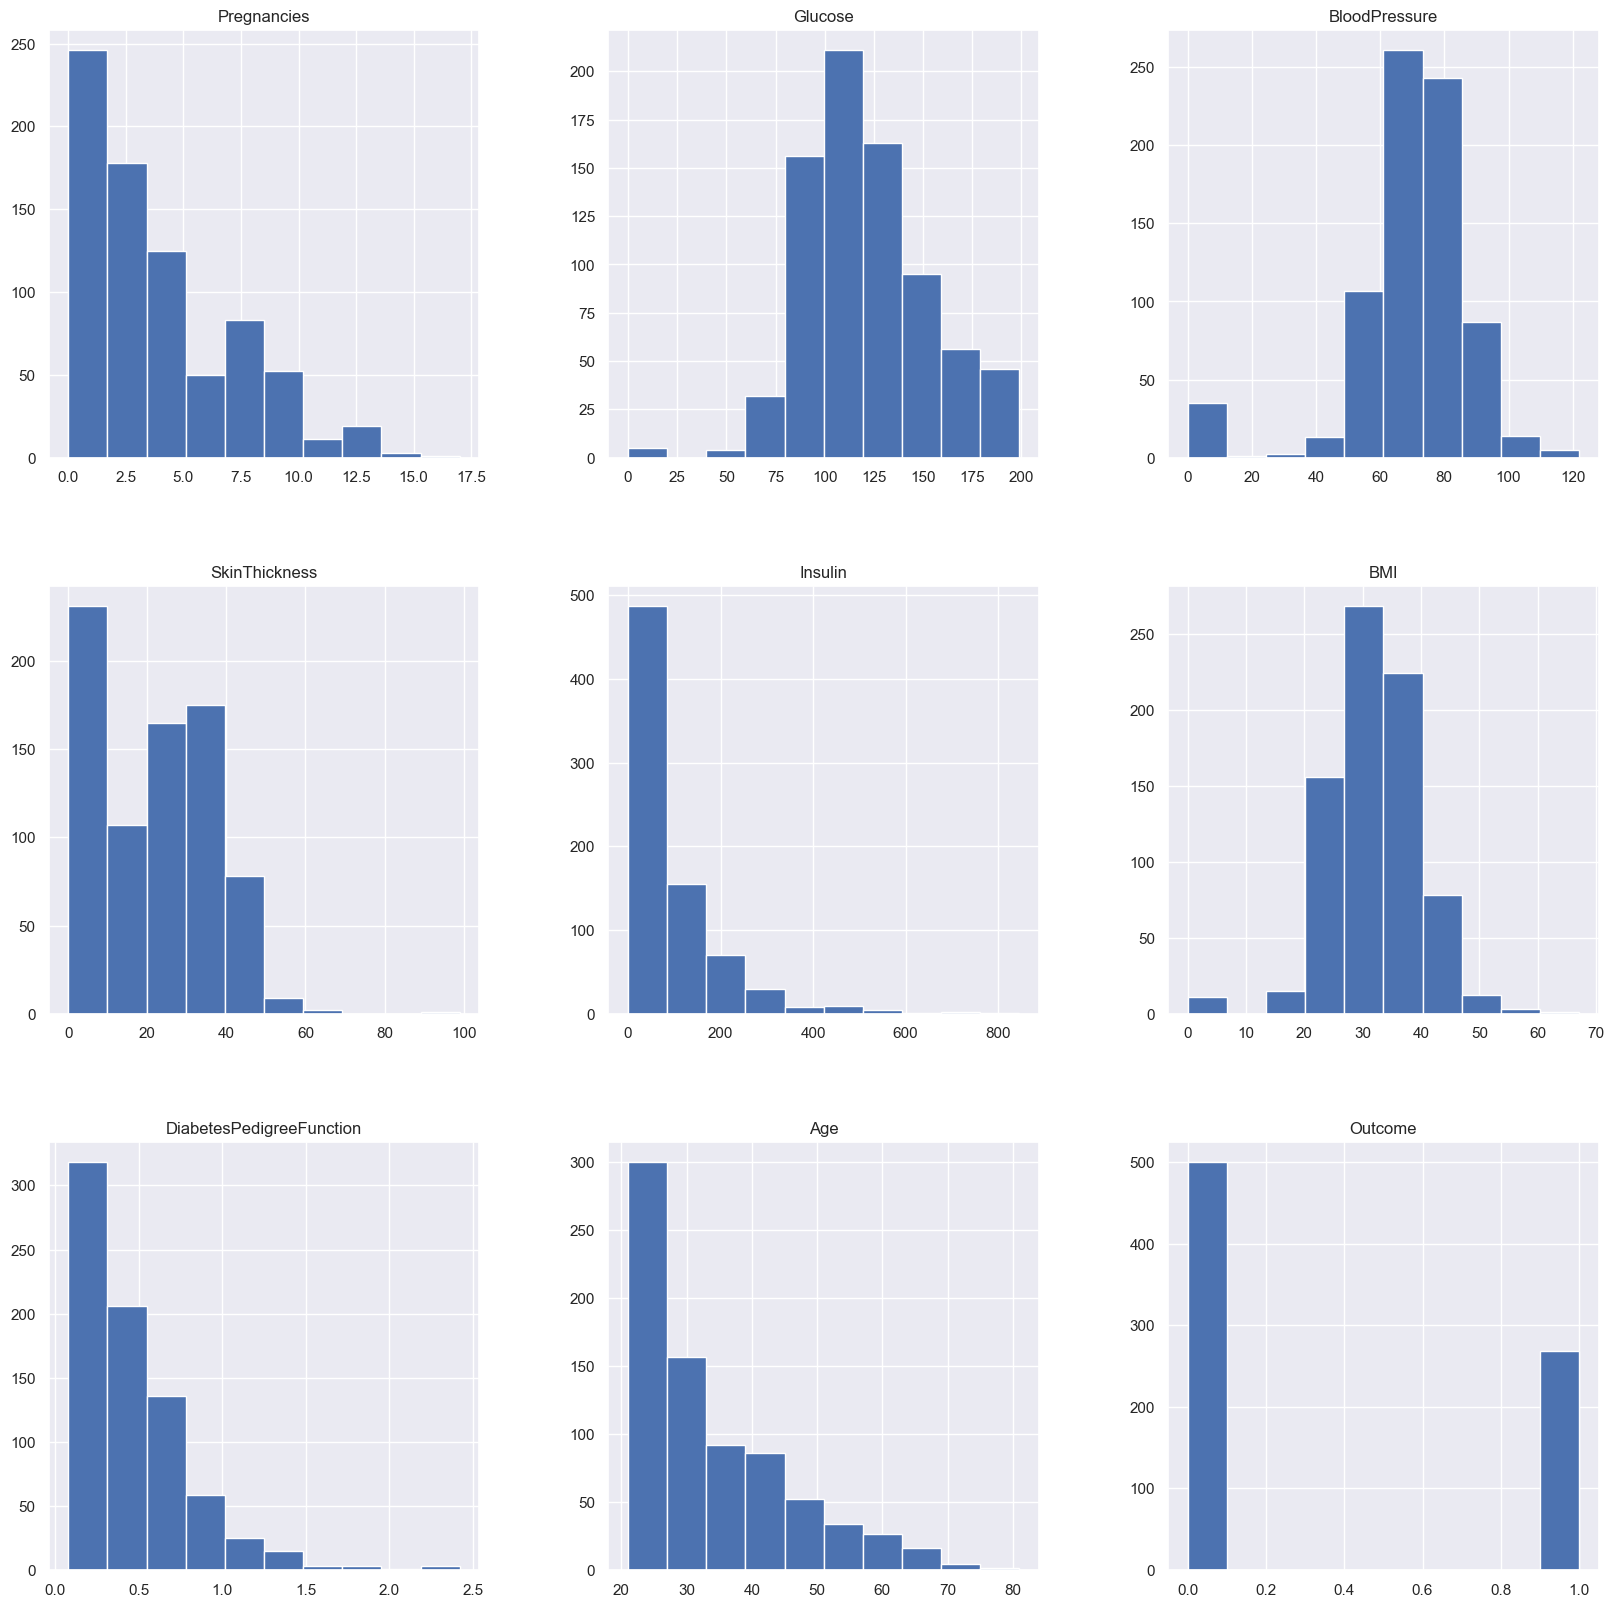

In [19]:
p = diabetes_data.hist(figsize=(20,20))

Con el objetivo de imputar valores nan para las columnas de acuerdo con su distribución

In [23]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace=True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace=True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace= True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace= True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace= True)

Graficamos luego de remover los NaN

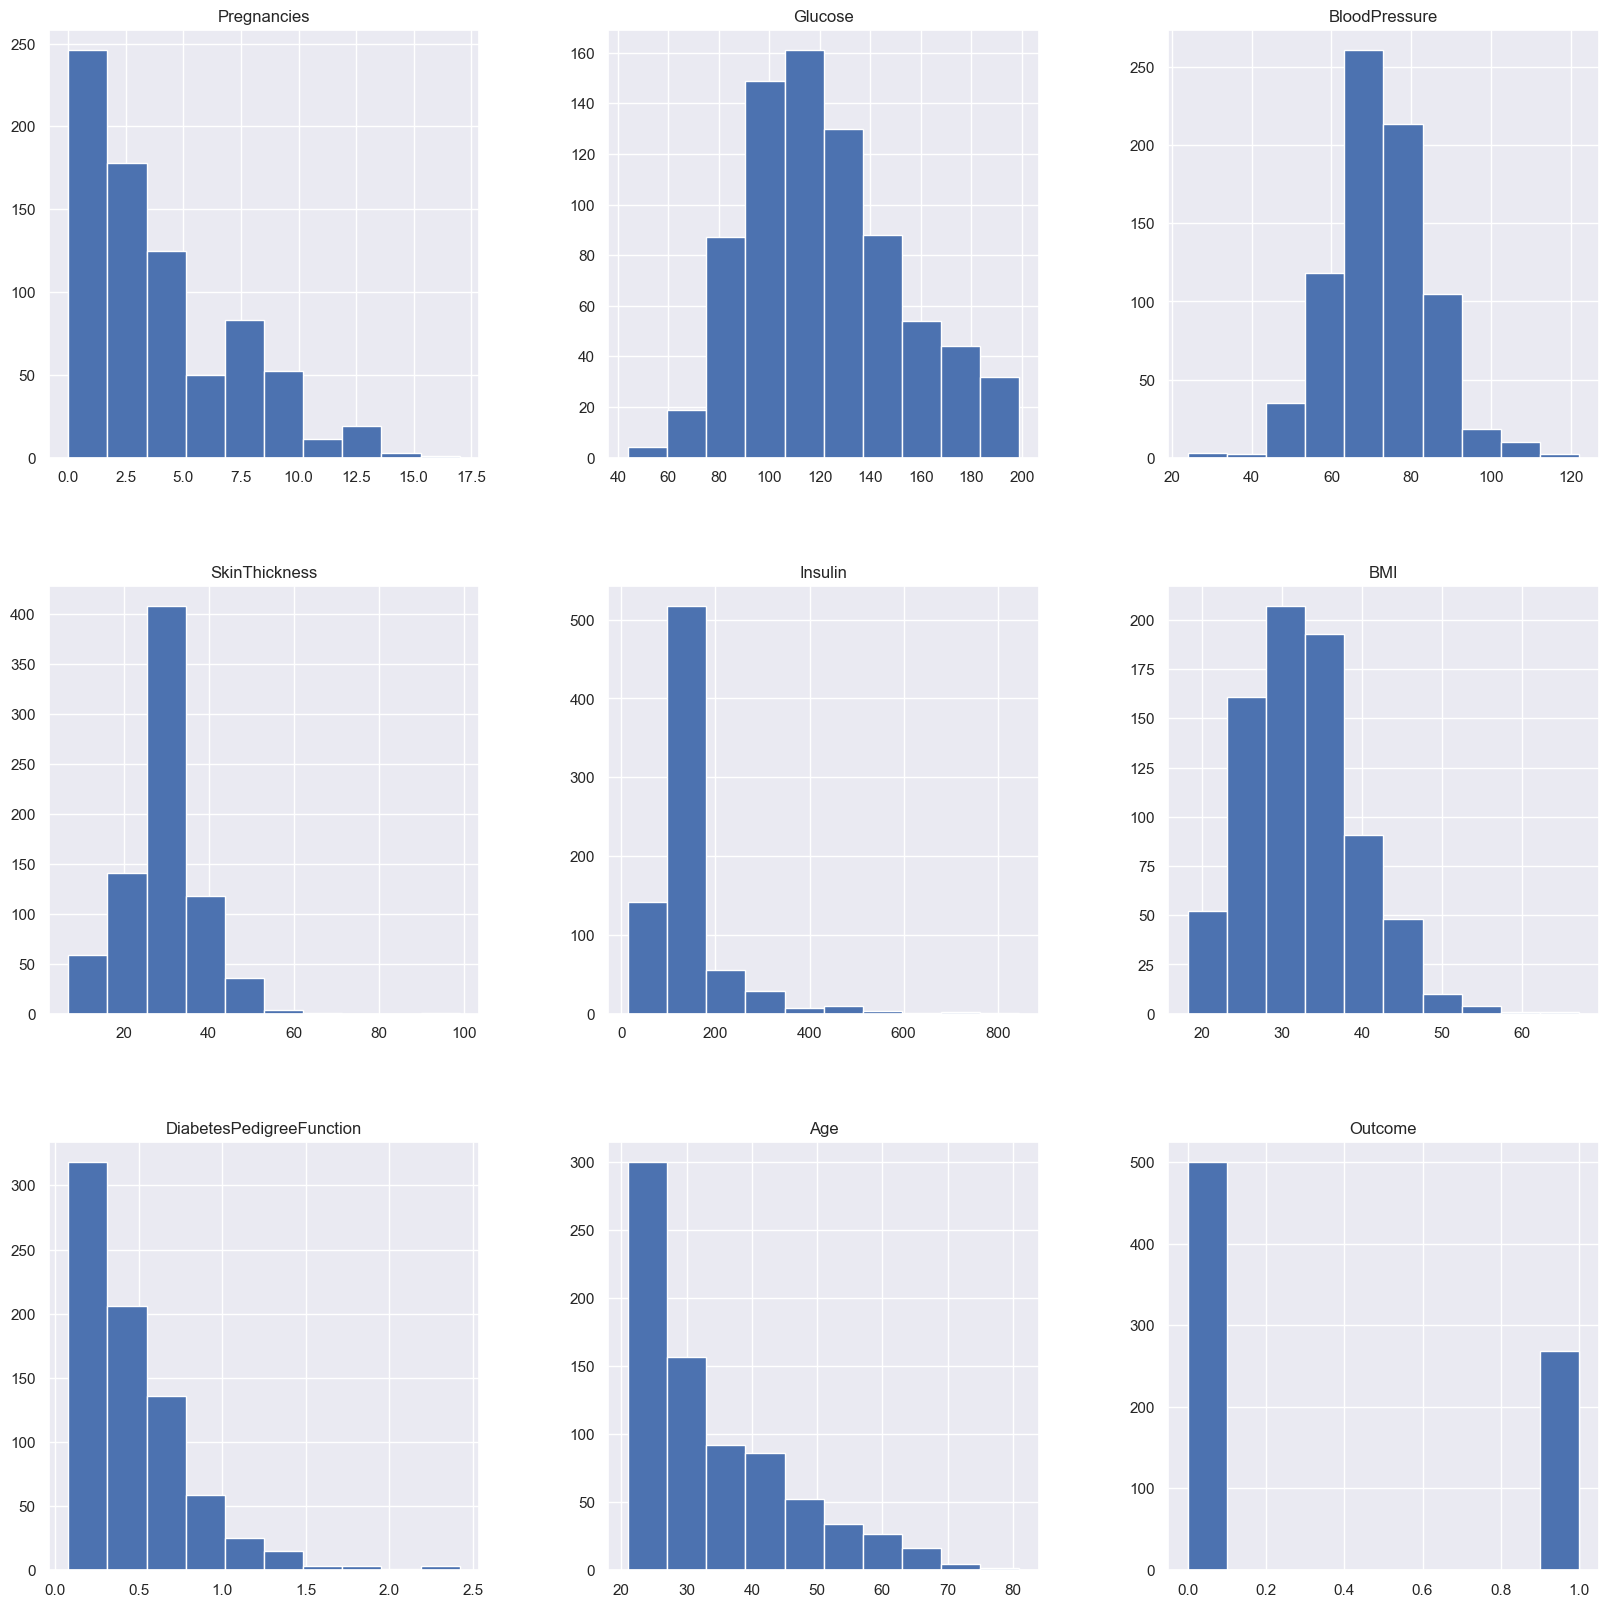

In [24]:
p = diabetes_data_copy.hist(figsize=(20,20))

Sesgo

Una ***distribución sesgada a la izquierda*** tiene una cola larga a la izquierda. Las distribuciones sesgadas a la izquierda también se llaman distribuciones con sesgo negativo. Esto se debe a que hay una cola larga en la dirección negativa en la línea de números. La media también está a la izquierda del pico.

Una ***distribución sesgada a la derecha*** tiene una cola larga a la derecha. Las distribuciones sesgadas a la derecha también se llaman distribuciones con sesgo positivo. Esto se debe a que hay una cola larga en la dirección positiva en la línea de números. La media también está a la derecha del pico.

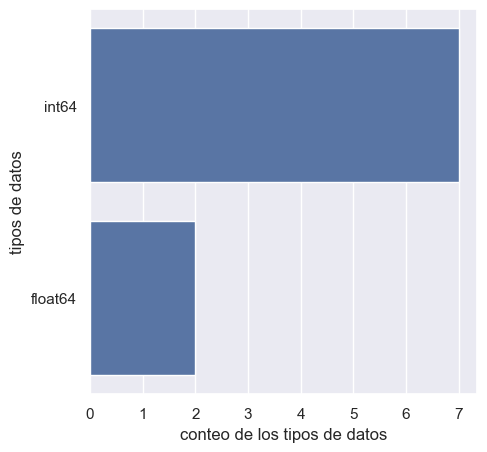

In [35]:
#observamos la forma de los datos
diabetes_data.shape

plt.figure(figsize=(5,5))
sns.set(font_scale=1)
sns.countplot(y=diabetes_data.dtypes, data=diabetes_data)
plt.xlabel("conteo de los tipos de datos")
plt.ylabel("tipos de datos")
plt.show()